In [4]:
from functools import reduce
from operator import concat
#C:\Users\Utsav Sinha\PycharmProjects\pythonProject
%pip install ijson

Note: you may need to restart the kernel to use updated packages.


In [1]:
from multiprocessing import Pool
from  zip_extraction1 import dir_list, zip_extraction1   #self made (custom import)
import numpy as np
import time

['geoEurope_2022060100.zip', 'geoEurope_2022060101.zip', 'geoEurope_2022060102.zip', 'geoEurope_2022060103.zip', 'geoEurope_2022060104.zip', 'geoEurope_2022060105.zip', 'geoEurope_2022060106.zip', 'geoEurope_2022060107.zip', 'geoEurope_2022060108.zip', 'geoEurope_2022060109.zip', 'geoEurope_2022060110.zip', 'geoEurope_2022060111.zip', 'geoEurope_2022060112.zip', 'geoEurope_2022060113.zip', 'geoEurope_2022060114.zip', 'geoEurope_2022060115.zip', 'geoEurope_2022060116.zip', 'geoEurope_2022060117.zip', 'geoEurope_2022060118.zip', 'geoEurope_2022060119.zip', 'geoEurope_2022060120.zip', 'geoEurope_2022060121.zip', 'geoEurope_2022060122.zip', 'geoEurope_2022060123.zip', 'geoEurope_2022060200.zip', 'geoEurope_2022060201.zip', 'geoEurope_2022060202.zip', 'geoEurope_2022060203.zip', 'geoEurope_2022060204.zip', 'geoEurope_2022060205.zip', 'geoEurope_2022060206.zip', 'geoEurope_2022060207.zip', 'geoEurope_2022060208.zip', 'geoEurope_2022060209.zip', 'geoEurope_2022060210.zip', 'geoEurope_20220602

In [2]:
import shutil
import os
from io import BytesIO
import zipfile
# import ndjson  #new line json
import json
import ijson
# import ndjson
import pandas as pd
import sys
import ndjson

In [4]:
os.getcwd()
os.chdir(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\twitter_data")

In [5]:
def info():    # multiprocess the files in the zip folders using the zip_ext
    list_of_zip_folders = dir_list(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\twitter_data")
    # print(list_of_zip_folders)
    with Pool(8) as pool:
       result = pool.map(zip_extraction1 , list_of_zip_folders)  # pool.map returns a list with zip files inside twitter folder
    return result


In [7]:
print(__name__)   #seems like __name__ always main
print("First Module's Name :{}".format(__name__))

__main__
First Module's Name :__main__


In [8]:
if __name__ == "__main__":  # Pool works only when using this if statement
    t = time.time()
    out = info()     #r() ---> return res  #re return r() means re returns res
    print((time.time()-t)/60)   #14.68

7.824665137132009


In [9]:
out[0:5]

[[(1531772510450208769, 'Tue May 31 23:00:00 +0000 2022', 'GB'),
  None,
  (1531772513306525696, 'Tue May 31 23:00:00 +0000 2022', 'TR'),
  (1531772513809842176, 'Tue May 31 23:00:00 +0000 2022', 'IT'),
  (1531772514262831104, 'Tue May 31 23:00:01 +0000 2022', 'ES'),
  (1531772514749366274, 'Tue May 31 23:00:01 +0000 2022', 'IT'),
  (1531772515672006656, 'Tue May 31 23:00:01 +0000 2022', 'GB'),
  (1531772516359864320, 'Tue May 31 23:00:01 +0000 2022', 'PL'),
  (1531772515806326786, 'Tue May 31 23:00:01 +0000 2022', 'IT'),
  (1531772516049780737, 'Tue May 31 23:00:01 +0000 2022', 'IR'),
  (1531772517534294018, 'Tue May 31 23:00:01 +0000 2022', 'GB'),
  None,
  None,
  (1531772519182647296, 'Tue May 31 23:00:02 +0000 2022', 'ES'),
  (1531772519065300992, 'Tue May 31 23:00:02 +0000 2022', 'ES'),
  (1531772519723814912, 'Tue May 31 23:00:02 +0000 2022', 'FR'),
  (1531772520059346948, 'Tue May 31 23:00:02 +0000 2022', 'CH'),
  (1531772520646549506, 'Tue May 31 23:00:02 +0000 2022', 'IE'),
 

In [10]:
len(out)   #list of list [[file1all ids],[file2 ids], [file3 ids] , [file4 ids]

720

#####Part 1
1. Count the total number of tweets, describing how you deal with duplicates or
other anomalies in the data set. [5 marks]

In [11]:
print(len(out[0]))  #picking list of list #first file
print(len(out[1]))  #picking list of list #second file


12156
5061


In [12]:
#i want before removing duplicates
from itertools import chain
def intialdata(chain_iter):      #removes duplicates of a given key
    return tuple(filter(lambda x: x, (chain(*chain_iter))))

In [13]:
def lister(chain_iter):          #removes duplicates (Property of set:- A set does not have duplicates)
    return tuple(filter(lambda x: x, set(chain(*chain_iter))))

In [15]:
# x= intialdata(out)
# len(x)

((1531772510450208769, '1654038000105', 'GB'),
 (1531772513306525696, '1654038000786', 'TR'),
 (1531772513809842176, '1654038000906', 'IT'),
 (1531772514262831104, '1654038001014', 'ES'),
 (1531772514749366274, '1654038001130', 'IT'),
 (1531772515672006656, '1654038001350', 'GB'),
 (1531772516359864320, '1654038001514', 'PL'),
 (1531772515806326786, '1654038001382', 'IT'),
 (1531772516049780737, '1654038001440', 'IR'),
 (1531772517534294018, '1654038001794', 'GB'),
 (1531772519182647296, '1654038002187', 'ES'),
 (1531772519065300992, '1654038002159', 'ES'),
 (1531772519723814912, '1654038002316', 'FR'),
 (1531772520059346948, '1654038002396', 'CH'),
 (1531772520646549506, '1654038002536', 'IE'),
 (1531772520415866882, '1654038002481', 'GB'),
 (1531772520864616450, '1654038002588', 'GB'),
 (1531772521678311425, '1654038002782', 'ES'),
 (1531772521695129604, '1654038002786', 'NL'),
 (1531772523527946240, '1654038003223', 'IE'),
 (1531772523125346305, '1654038003127', 'IT'),
 (15317725243

15033604

In [14]:
y = lister(out)
len(y)    #15026765

15026765

4.1) Identify 3 days with unusually high activity in 3 different countries of your
choosing.
For example you could choose one day in the UK, one in France
and one in Turkey. Describe and justify how you identify ‘unusual’ days. [5
marks]


In [15]:
y[0:5]

((1536048710236479494, 'Sun Jun 12 18:12:05 +0000 2022', 'IT'),
 (1532251372405530624, 'Thu Jun 02 06:42:49 +0000 2022', 'GB'),
 (1537108380464078848, 'Wed Jun 15 16:22:50 +0000 2022', 'TR'),
 (1539584866702041091, 'Wed Jun 22 12:23:30 +0000 2022', 'IT'),
 (1542034277730328576, 'Wed Jun 29 06:36:36 +0000 2022', 'NL'))

In [16]:
import pandas as pd
df4 = pd.DataFrame(y, columns=["twt_id","created_at","country_code"])
df4.head()

,twt_id,created_at,country_code
0,1536048710236479494,Sun Jun 12 18:12:05 +0000 2022,IT
1,1532251372405530624,Thu Jun 02 06:42:49 +0000 2022,GB
2,1537108380464078848,Wed Jun 15 16:22:50 +0000 2022,TR
3,1539584866702041091,Wed Jun 22 12:23:30 +0000 2022,IT
4,1542034277730328576,Wed Jun 29 06:36:36 +0000 2022,NL


In [17]:
df4[['created_at']] = df4[['created_at']].apply(pd.to_datetime)

In [19]:
df4['time_local'] = df4['created_at'].dt.tz_convert('Europe/London')
df4.head()

,twt_id,created_at,country_code,time_local
0,1536048710236479494,2022-06-12 18:12:05+00:00,IT,2022-06-12 19:12:05+01:00
1,1532251372405530624,2022-06-02 06:42:49+00:00,GB,2022-06-02 07:42:49+01:00
2,1537108380464078848,2022-06-15 16:22:50+00:00,TR,2022-06-15 17:22:50+01:00
3,1539584866702041091,2022-06-22 12:23:30+00:00,IT,2022-06-22 13:23:30+01:00
4,1542034277730328576,2022-06-29 06:36:36+00:00,NL,2022-06-29 07:36:36+01:00


In [20]:
print(df4['time_local'].agg(['min', 'max']))
df4['day']= df4['time_local'].dt.day  #day
df4.head()

min   2022-06-01 00:00:00+01:00
max   2022-06-30 23:59:59+01:00
Name: time_local, dtype: datetime64[ns, Europe/London]


,twt_id,created_at,country_code,time_local,day
0,1536048710236479494,2022-06-12 18:12:05+00:00,IT,2022-06-12 19:12:05+01:00,12
1,1532251372405530624,2022-06-02 06:42:49+00:00,GB,2022-06-02 07:42:49+01:00,2
2,1537108380464078848,2022-06-15 16:22:50+00:00,TR,2022-06-15 17:22:50+01:00,15
3,1539584866702041091,2022-06-22 12:23:30+00:00,IT,2022-06-22 13:23:30+01:00,22
4,1542034277730328576,2022-06-29 06:36:36+00:00,NL,2022-06-29 07:36:36+01:00,29


In [21]:
df4.to_csv(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files\question4.csv")

In [9]:

df4 = pd.read_csv(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files\question4.csv")
df4.head()

,Unnamed: 0,twt_id,created_at,country_code,time_local,day
0,0,1536048710236479494,2022-06-12 18:12:05+00:00,IT,2022-06-12 19:12:05+01:00,12
1,1,1532251372405530624,2022-06-02 06:42:49+00:00,GB,2022-06-02 07:42:49+01:00,2
2,2,1537108380464078848,2022-06-15 16:22:50+00:00,TR,2022-06-15 17:22:50+01:00,15
3,3,1539584866702041091,2022-06-22 12:23:30+00:00,IT,2022-06-22 13:23:30+01:00,22
4,4,1542034277730328576,2022-06-29 06:36:36+00:00,NL,2022-06-29 07:36:36+01:00,29


In [10]:
df4["country_code"].value_counts()

GB    3511478
TR    2592040
ES    2044359
FR    1081186
IT     859865
       ...   
TM        374
SM        306
GL        297
JE        144
AX         40
Name: country_code, Length: 70, dtype: int64

In [11]:
df4_UK = df4.loc[(df4["country_code"] == "GB")]
df4_UK.shape  #3511478

(3511478, 6)

In [12]:
df4_TUR = df4.loc[(df4["country_code"] == "TR")]
df4_TUR.shape  #2592040

(2592040, 6)

In [13]:
df4_France = df4.loc[(df4["country_code"] == "FR")]
df4_France.shape  ##1081186

(1081186, 6)

In [14]:
(df4["country_code"] == "FR").sum()  #1081186

1081186

In [15]:
(df4["country_code"] == "TR").sum()  #2592040

2592040

In [16]:
(df4["country_code"] == "GB").sum()

3511478

In [17]:
df4_UK.head()

,Unnamed: 0,twt_id,created_at,country_code,time_local,day
1,1,1532251372405530624,2022-06-02 06:42:49+00:00,GB,2022-06-02 07:42:49+01:00,2
5,5,1542269062469779456,2022-06-29 22:09:33+00:00,GB,2022-06-29 23:09:33+01:00,29
15,15,1532440194909192214,2022-06-02 19:13:08+00:00,GB,2022-06-02 20:13:08+01:00,2
16,16,1531974278169694210,2022-06-01 12:21:45+00:00,GB,2022-06-01 13:21:45+01:00,1
22,22,1542060297501941764,2022-06-29 08:19:59+00:00,GB,2022-06-29 09:19:59+01:00,29


In [18]:
###UK Tweets by day
print(df4_UK['time_local'].agg(['min', 'max']))
df4_UK_byday = df4_UK.groupby('day').agg(num_of_twt = ('twt_id','nunique')).reset_index()
df4_UK_byday.head()

min    2022-06-01 00:00:00+01:00
max    2022-06-30 23:59:58+01:00
Name: time_local, dtype: object


,day,num_of_twt
0,1,125963
1,2,122923
2,3,114273
3,4,119531
4,5,118605


In [19]:
df4_UK_byday.columns
df4_UK_byday.nlargest(5, 'num_of_twt')       #top 5 count of the column

,day,num_of_twt
23,24,133194
0,1,125963
13,14,125487
1,2,122923
16,17,122908


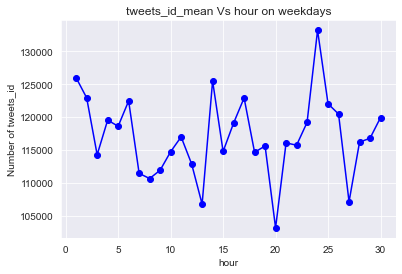

In [20]:
###UK BY DAY
import matplotlib.pyplot as plt
plt.plot(df4_UK_byday["day"], df4_UK_byday["num_of_twt"],color='blue', marker='o')
plt.title('tweets_id_mean Vs hour on weekdays')
plt.xlabel('hour')
plt.ylabel('Number of tweets_id')

# plt.xsticks(df4_UK_byday.day )
# plt.ysticks(df4_UK_byday.num_of_twt)
plt.show()

#unusual days  in UK
# 24th June :- 133194

In [21]:
###############################################################France Tweets by day
print(df4_France['time_local'].agg(['min', 'max']))
df4_France_byday = df4_France.groupby('day').agg(num_of_twt = ('twt_id','nunique')).reset_index()
df4_France_byday.head()

min    2022-06-01 00:00:02+01:00
max    2022-06-30 23:59:57+01:00
Name: time_local, dtype: object


,day,num_of_twt
0,1,37441
1,2,34834
2,3,36771
3,4,34021
4,5,36162


In [22]:
df4_France_byday.columns
df4_France_byday.nlargest(5, 'num_of_twt')       #top 5 count of the column

,day,num_of_twt
18,19,41537
16,17,38520
15,16,38212
11,12,37870
14,15,37530


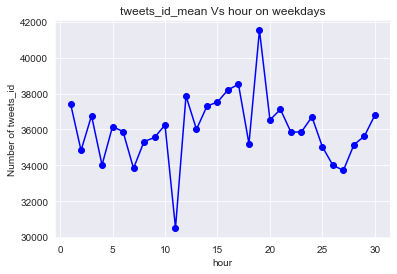

In [23]:
###France BY DAY
import matplotlib.pyplot as plt
plt.plot(df4_France_byday["day"], df4_France_byday["num_of_twt"],color='blue', marker='o')
plt.title('tweets_id_mean Vs hour on weekdays')
plt.xlabel('hour')
plt.ylabel('Number of tweets_id')
plt.show()

#unusual days  in fRANCE
# 19th June :- 41537

In [24]:
############################################################Turkey Tweets by day

print(df4_TUR['time_local'].agg(['min', 'max']))
df4_TUR_byday = df4_TUR.groupby('day').agg(num_of_twt = ('twt_id','nunique')).reset_index()
df4_TUR_byday.head()

min    2022-06-01 00:00:00+01:00
max    2022-06-30 23:59:59+01:00
Name: time_local, dtype: object


,day,num_of_twt
0,1,93297
1,2,85247
2,3,85062
3,4,83672
4,5,83708


In [25]:
df4_TUR_byday.columns
df4_TUR_byday.nlargest(5, 'num_of_twt')       #top 5 count of the column

,day,num_of_twt
27,28,94551
0,1,93297
11,12,92865
28,29,91626
26,27,90100


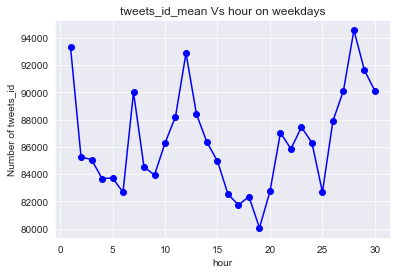

In [26]:
###France BY DAY
import matplotlib.pyplot as plt
plt.plot(df4_TUR_byday["day"], df4_TUR_byday["num_of_twt"],color='blue', marker='o')
plt.title('tweets_id_mean Vs hour on weekdays')
plt.xlabel('hour')
plt.ylabel('Number of tweets_id')

plt.show()

##unusual days  in Turkey
# 28TH June :- 94551

##Describe and justify how you identify ‘unusual’ days

Unusual days because of having max number of tweets on this day. People engaged a lot for sharing information, tags.

#unusual days  in UK
# 24th June :- 133194



#unusual days  in fRANCE
# 19th June :- 41537

##unusual days  in Turkey
# 28TH June :- 94551








2. Characterise each of these three days by
a. Making a word cloud from the tweet text. [5 marks]
b. Any other method. [5 marks]

In [3]:
def info():    # multiprocess the files in the zip folders using the zip_ext
    list_of_zip_folders = dir_list(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\twitter_data")
    # print(list_of_zip_folders)
    with Pool(8) as pool:
       result = pool.map(zip_extraction1 , list_of_zip_folders)  # pool.map returns a list with zip files inside twitter folder
    return result

In [4]:
print(__name__)   #seems like __name__ always main
print("First Module's Name :{}".format(__name__))

__main__
First Module's Name :__main__


In [ ]:
if __name__ == "__main__":  # Pool works only when using this if statement
    t = time.time()
    out = info()     #r() ---> return res  #re return r() means re returns res
    print((time.time()-t)/60)   #14.68

In [ ]:
out

In [ ]:
data42 = lister(out)
len(data42)

In [10]:
len(reduce(concat, out))   #all the tweets ids of all the list

NameError: name 'reduce' is not defined

In [11]:
out_list = reduce(concat,out)

NameError: name 'reduce' is not defined

In [12]:
os.getcwd()
os.chdir(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files")

In [ ]:
print(len(out_list))
print(type(out_list))
out_list[:10]

In [ ]:
15040709-15040387

In [18]:
uniq_tweets = list(set(out))
len(uniq_tweets)   #15033548

TypeError: unhashable type: 'list'

In [35]:

# Finding Duplicate Items in a Python

# Finding Duplicate Items in a Python List and Count Themfrom collections   #15040387
from collections import Counter
# numbers = [1, 2, 3, 2, 5, 3, 3, 5, 6, 3, 4, 5, 7]  #out_list
counts = dict(Counter(out_list))
# print(counts)   #{1: 1, 2: 2, 3: 4, 5: 3, 6: 1, 4: 1, 7: 1}
duplicates_tweets = {key:value for key, value in counts.items() if value > 1}
# print(duplicates)   ## Returns: {2: 2, 3: 4, 5: 3}  we can view the duplicates
print(duplicates_tweets)  #number of keys   #5667  is the duplicates_tweets   #5666
# duplicates_tweets_actual_count  = sum(duplicates_tweets.values())
# print(duplicates_tweets_actual_count)    #12505

# print(15040387 - 12505)  #15027882

# # Remove Duplicates from a List in Python
# # numbers = [1, 2, 3, 2, 5, 3, 3, 5, 6, 3, 4, 5, 7]
# unique_tweets = list(set(tweet1))  #this will remove the duplicates in out_list(list)
# # print(unique_tweets)  ## Returns: [1, 2, 3, 4, 5, 6, 7]
# print(len(unique_tweets))  #15033549
# 15040709 - 15033549    #15040709 is the total tweets and 15033549 is after removing duplicates.

{(1531782424736178176, 'Tue May 31 23:39:23 +0000 2022'): 2, (1531787619662712834, 'Wed Jun 01 00:00:02 +0000 2022'): 2, (1531934486937608192, 'Wed Jun 01 09:43:38 +0000 2022'): 2, (1531934628231118850, 'Wed Jun 01 09:44:11 +0000 2022'): 2, (1531952641240088578, 'Wed Jun 01 10:55:46 +0000 2022'): 2, (1532060783781236737, 'Wed Jun 01 18:05:29 +0000 2022'): 2, (None, None): 322, (1532077899754491905, 'Wed Jun 01 19:13:30 +0000 2022'): 2, (1532077907509710851, 'Wed Jun 01 19:13:32 +0000 2022'): 2, (1532078981465653248, 'Wed Jun 01 19:17:48 +0000 2022'): 4, (1532078981310304261, 'Wed Jun 01 19:17:48 +0000 2022'): 2, (1532078982245621762, 'Wed Jun 01 19:17:48 +0000 2022'): 2, (1532078987542863872, 'Wed Jun 01 19:17:49 +0000 2022'): 2, (1532078996917059585, 'Wed Jun 01 19:17:52 +0000 2022'): 2, (1532078992534167555, 'Wed Jun 01 19:17:51 +0000 2022'): 2, (1532078991070613504, 'Wed Jun 01 19:17:50 +0000 2022'): 2, (1532079007428407296, 'Wed Jun 01 19:17:54 +0000 2022'): 3, (1532079020526997505

In [26]:
# res = Counter(duplicates_tweets.values())
# print(res)

In [25]:
# #removed duplicates
# print(duplicates_tweets)
# # out_list
# unique_tweets1 = list(dict.fromkeys(duplicates_tweets_actual_count))
# print(len(unique_tweets1))  #15033549

In [ ]:
# print(len(unique_tweets1))  #15033549  after removing duplicates
# print(type(unique_tweets1))   #15033549
#
#
# print(len(tweet1))
# seen = set()
# uniq = [tweet1 for tweet1 in tweet1 if tweet1 not in seen and not seen.add(tweet1)]
# # uniq
# len(uniq)  #15033549 we are right after removing duplicates it is 15033549
# uniq[0]

In [40]:
uniq_tweets[:10]

[(1534910479818182656, 'Thu Jun 09 14:49:10 +0000 2022'),
 (1538280386987450372, 'Sat Jun 18 21:59:58 +0000 2022'),
 (1534154767445942275, 'Tue Jun 07 12:46:14 +0000 2022'),
 (1535927345030344706, 'Sun Jun 12 10:09:49 +0000 2022'),
 (1532041275742076928, 'Wed Jun 01 16:47:58 +0000 2022'),
 (1535347647518760962, 'Fri Jun 10 19:46:19 +0000 2022'),
 (1533129569858949120, 'Sat Jun 04 16:52:28 +0000 2022'),
 (1533932745730170881, 'Mon Jun 06 22:04:00 +0000 2022'),
 (1536631053582012417, 'Tue Jun 14 08:46:07 +0000 2022'),
 (1533113965760417796, 'Sat Jun 04 15:50:27 +0000 2022')]

In [23]:
# uniq_tweets = out_list
# len(uniq_tweets)

15040709

In [41]:
import pandas as pd
data1 = pd.DataFrame(uniq_tweets , columns  =["tweets_id","created_date"])#,"user_id"])
data1.head()

,tweets_id,created_date
0,1534910479818182656,Thu Jun 09 14:49:10 +0000 2022
1,1538280386987450372,Sat Jun 18 21:59:58 +0000 2022
2,1534154767445942275,Tue Jun 07 12:46:14 +0000 2022
3,1535927345030344706,Sun Jun 12 10:09:49 +0000 2022
4,1532041275742076928,Wed Jun 01 16:47:58 +0000 2022


In [42]:
os.getcwd()
data1.shape    #(15033548, 2)

(15033548, 2)

In [43]:
# import os
# os.getcwd()
# os.chdir(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files")

data1.to_csv('data1v1.csv')   #now I can import it

# data1.to_csv('data2_all_three.csv')   #now I can import it

In [46]:
import pandas as pd
data1 = pd.read_csv(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files\data1v1.csv", index_col=[0])
data1.shape

(15033548, 2)

In [47]:
data1.head()


,tweets_id,created_date
0,1534910479818182656,Thu Jun 09 14:49:10 +0000 2022
1,1538280386987450372,Sat Jun 18 21:59:58 +0000 2022
2,1534154767445942275,Tue Jun 07 12:46:14 +0000 2022
3,1535927345030344706,Sun Jun 12 10:09:49 +0000 2022
4,1532041275742076928,Wed Jun 01 16:47:58 +0000 2022


In [48]:
data1[['created_date']] = data1[['created_date']].apply(pd.to_datetime)   # # always do this date column
# data1['created_date'] = pd.to_datetime(data1['created_date'])
data1.head()




,tweets_id,created_date
0,1534910479818182656,2022-06-09 14:49:10+00:00
1,1538280386987450372,2022-06-18 21:59:58+00:00
2,1534154767445942275,2022-06-07 12:46:14+00:00
3,1535927345030344706,2022-06-12 10:09:49+00:00
4,1532041275742076928,2022-06-01 16:47:58+00:00


In [52]:
data1['year']= data1['created_date'].dt.year
data1['month']= data1['created_date'].dt.month
data1['day']= data1['created_date'].dt.day  #day
data1.head()

,tweets_id,created_date,year,month,day
0,1534910479818182656,2022-06-09 14:49:10+00:00,2022,6,9
1,1538280386987450372,2022-06-18 21:59:58+00:00,2022,6,18
2,1534154767445942275,2022-06-07 12:46:14+00:00,2022,6,7
3,1535927345030344706,2022-06-12 10:09:49+00:00,2022,6,12
4,1532041275742076928,2022-06-01 16:47:58+00:00,2022,6,1


In [57]:
print(data1["month"].value_counts())
print((data1["month"]).astype(int))


6    15021393
5       12155
Name: month, dtype: int64
0           6
1           6
2           6
3           6
4           6
           ..
15033543    6
15033544    6
15033545    6
15033546    6
15033547    6
Name: month, Length: 15033548, dtype: int32


In [58]:
# final.loc[((final["Reason Type"] == "OBS") & (final["diff"]<368))
data_of_jun = data1.loc[(data1["month"] == 6)]
data_of_jun.shape

(15021393, 5)

In [59]:
data_of_jun.head()

,tweets_id,created_date,year,month,day
0,1534910479818182656,2022-06-09 14:49:10+00:00,2022,6,9
1,1538280386987450372,2022-06-18 21:59:58+00:00,2022,6,18
2,1534154767445942275,2022-06-07 12:46:14+00:00,2022,6,7
3,1535927345030344706,2022-06-12 10:09:49+00:00,2022,6,12
4,1532041275742076928,2022-06-01 16:47:58+00:00,2022,6,1


<AxesSubplot:xlabel='day', ylabel='count'>

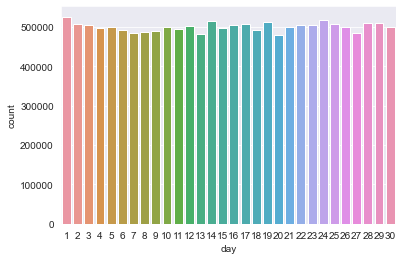

In [60]:
import seaborn as sns
# plt.figure(figsize=(8, 6))
sns.countplot(x=data_of_jun["day"])

   day  tweets_id
0    1     526083
1    2     507733
2    3     505017
3    4     497982
4    5     500698
(15033548, 5)


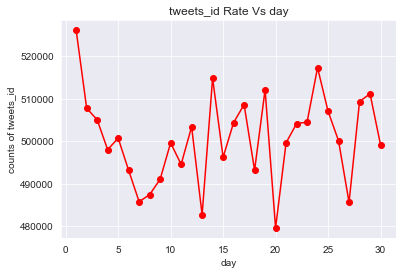

In [61]:
data1.head(10)
data1["created_date"].value_counts()

# data2 = data1.groupby(['day',"tweets_id"]).size().reset_index(name='counts')

data2 = data_of_jun.groupby(['day'])['tweets_id'].agg('count').reset_index()
# print(data2)
print(data2.head())
data2.columns

print(data1.shape)

import matplotlib.pyplot as plt
plt.plot(data2["day"], data2["tweets_id"],color='red', marker='o')
plt.title('tweets_id Rate Vs day')
plt.xlabel('day')
plt.ylabel('counts of tweets_id')
plt.show()

#### describing how you deal with duplicates or other anomalies in the data set. [5 marks]

# there are duplicates tweets which does not make any sense whenever specific user tweets it happens with specific tweet id.
#hence it requires to be unique.
#after removing duplicates unique_tweets is 15033548
# data2.head()

In [10]:
# data1.set_index('real date', inplace= True)
# data.index.name = 'date'
# data.index = pd.to_datetime(data.index)

data1["weekday"]=data1.apply(lambda row: row["created_date"].weekday(),axis=1)
data1["weekend"] = (data1["weekday"] < 5).astype(int)

In [11]:

# data1["weekend"].value_counts()
data1["freq_of_id"] = data1.groupby("tweets_id")["tweets_id"].transform("count")
print(data1.head(10))

             tweets_id              created_date  day  weekday  weekend  \
0  1541828541096026112 2022-06-28 16:59:04+00:00   28        1        1   
1  1535029691706495005 2022-06-09 22:42:52+00:00    9        3        1   
2  1539319665922564097 2022-06-21 18:49:42+00:00   21        1        1   
3  1536288210044825601 2022-06-13 10:03:46+00:00   13        0        1   
4  1531852443713249280 2022-06-01 04:17:37+00:00    1        2        1   
5  1539867345417641986 2022-06-23 07:05:59+00:00   23        3        1   
6  1536681768371240963 2022-06-14 12:07:38+00:00   14        1        1   
7  1538216422668742657 2022-06-18 17:45:48+00:00   18        5        0   
8  1534683800621441025 2022-06-08 23:48:25+00:00    8        2        1   
9  1533144449974517761 2022-06-04 17:51:35+00:00    4        5        0   

   freq_of_id  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1 

KeyError: 'tweets_on_'

In [55]:
print(data1["freq_of_id"].value_counts())
data1.head()

1    15033548
Name: freq_of_id, dtype: int64


,tweets_id,created_date,day,weekday,weekend,freq_of_id,hour,countbased_on_wd_we,day_name
0,1541828541096026112,2022-06-28 16:59:04+00:00,28,1,1,1,16,11024635,Tue
1,1535029691706495005,2022-06-09 22:42:52+00:00,9,3,1,1,22,11024635,Thru
2,1539319665922564097,2022-06-21 18:49:42+00:00,21,1,1,1,18,11024635,Tue
3,1536288210044825601,2022-06-13 10:03:46+00:00,13,0,1,1,10,11024635,Mon
4,1531852443713249280,2022-06-01 04:17:37+00:00,1,2,1,1,4,11024635,wed


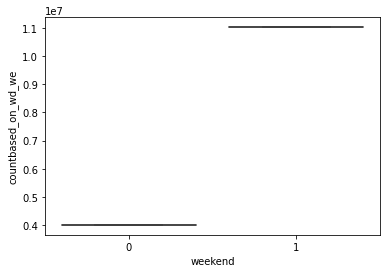

In [54]:
#3. Use box and whisker diagrams to compare the average number of tweets on
# weekdays to the numbers for weekend days.
# Are there statistically significant
# differences between the number of tweets on weekdays and weekends? [5
# marks]


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.boxplot(x = data1["weekend"],y = data1["countbased_on_wd_we"])
# sns.boxplot(data=data1,x='weekend', y='value', hue='weekend')
plt.show()

In [ ]:
#3. Use box and whisker diagrams to compare the average number of tweets on
# weekdays to the numbers for weekend days.
# Are there statistically significant
# differences between the number of tweets on weekdays and weekends? [5
# marks]


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.boxplot(x = data1["weekend"],y = data1["countbased_on_wd_we"])
# sns.boxplot(data=data1,x='weekend', y='value', hue='weekend')
plt.show()

In [19]:
data1["countbased_on_wd_we"] = data1.groupby('weekend')["tweets_id"].transform("count")
data1.head(20)

,tweets_id,created_date,day,weekday,weekend,freq_of_id,hour,countbased_on_wd_we
0,1541828541096026112,2022-06-28 16:59:04+00:00,28,1,1,1,16,11024635
1,1535029691706495005,2022-06-09 22:42:52+00:00,9,3,1,1,22,11024635
2,1539319665922564097,2022-06-21 18:49:42+00:00,21,1,1,1,18,11024635
3,1536288210044825601,2022-06-13 10:03:46+00:00,13,0,1,1,10,11024635
4,1531852443713249280,2022-06-01 04:17:37+00:00,1,2,1,1,4,11024635
5,1539867345417641986,2022-06-23 07:05:59+00:00,23,3,1,1,7,11024635
6,1536681768371240963,2022-06-14 12:07:38+00:00,14,1,1,1,12,11024635
7,1538216422668742657,2022-06-18 17:45:48+00:00,18,5,0,1,17,4008913
8,1534683800621441025,2022-06-08 23:48:25+00:00,8,2,1,1,23,11024635
9,1533144449974517761,2022-06-04 17:51:35+00:00,4,5,0,1,17,4008913


In [14]:
# extracts just the hour
data1['hour'] = data1['created_date'].dt.hour
data1.head()

,tweets_id,created_date,day,weekday,weekend,freq_of_id,hour
0,1541828541096026112,2022-06-28 16:59:04+00:00,28,1,1,1,16
1,1535029691706495005,2022-06-09 22:42:52+00:00,9,3,1,1,22
2,1539319665922564097,2022-06-21 18:49:42+00:00,21,1,1,1,18
3,1536288210044825601,2022-06-13 10:03:46+00:00,13,0,1,1,10
4,1531852443713249280,2022-06-01 04:17:37+00:00,1,2,1,1,4


In [30]:
data1["weekday"].value_counts()

2    2524934
3    2506709
4    2030453
1    2021585
6    2016215
5    1992698
0    1940954
Name: weekday, dtype: int64

In [31]:
#averaged tweets over all weekdays
d = {0 : "Mon",
     1 : "Tue",
     2 : "wed",
     3 : "Thru",
     4 : "Fri",
     5 :"sat",
     6 :"sun"
      }
data1["day_name"] = data1["weekday"].map(d)
data1["day_name"].value_counts()
# data1.head()
data1["day_name"].value_counts()

wed     2524934
Thru    2506709
Fri     2030453
Tue     2021585
sun     2016215
sat     1992698
Mon     1940954
Name: day_name, dtype: int64

In [43]:
data_weekdays["day_name"].value_counts()

wed     2524934
Thru    2506709
Fri     2030453
Tue     2021585
sun     2016215
sat     1992698
Mon     1940954
Name: day_name, dtype: int64

<AxesSubplot:xlabel='day_name', ylabel='count'>

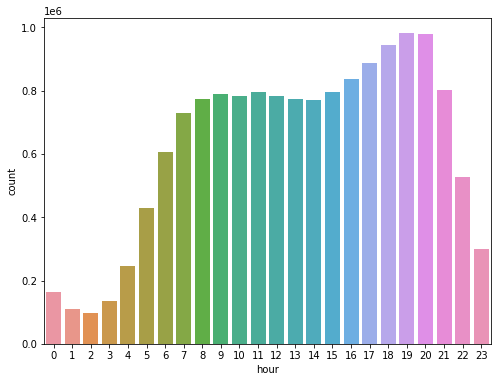

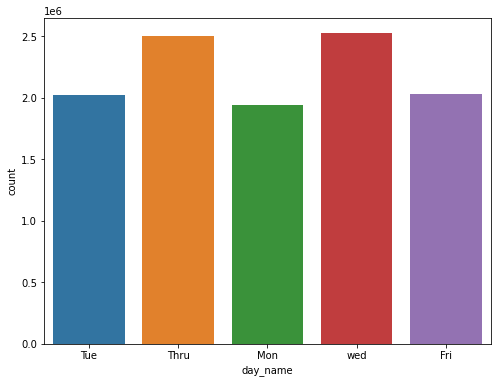

In [47]:
# Plot a time-series of the number of tweets by hour,
# averaged over all weekdays and
# comment on what you see. [5 marks]
plt.figure(figsize=(8, 6))
sns.countplot(x=data1["hour"])

#average overall weekdays
plt.figure(figsize=(8, 6))

data_weekdays = data1.loc[(data1["day_name"] == "Mon") | (data1["day_name"] == "Tue") |
                           (data1["day_name"] == "wed") |  (data1["day_name"] == "Thru") | (data1["day_name"] == "Fri") ]
sns.countplot(x='day_name', data=data_weekdays )



<AxesSubplot:xlabel='day_name'>

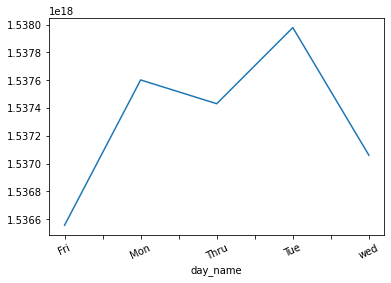

In [51]:
data_weekdays.shape
data_weekdays.groupby(data_weekdays['day_name'])["tweets_id"].mean().plot(kind="line",rot=25)

In [32]:
import pandas as pd
data3 = pd.read_csv(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\export files\data2_all_three.csv", index_col=[0])

data3.head()

,tweets_id,created_date,user_id
0,1.531773e+18,Tue May 31 23:00:00 +0000 2022,1.276253e+08
1,1.531773e+18,Tue May 31 23:00:00 +0000 2022,1.092190e+09
2,1.531773e+18,Tue May 31 23:00:00 +0000 2022,2.899308e+07
3,1.531773e+18,Tue May 31 23:00:00 +0000 2022,8.671348e+08
4,1.531773e+18,Tue May 31 23:00:01 +0000 2022,6.356244e+08


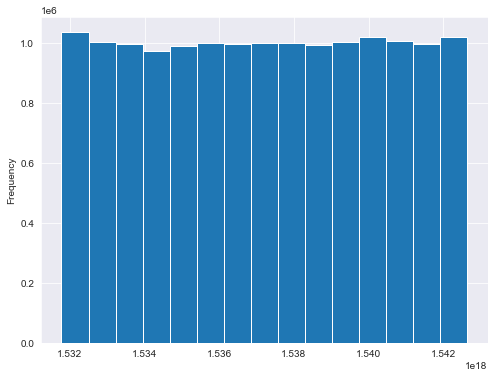

In [43]:
data3.tweets_id.plot.hist(bins  =15, figsize = (8,6))
plt.show();

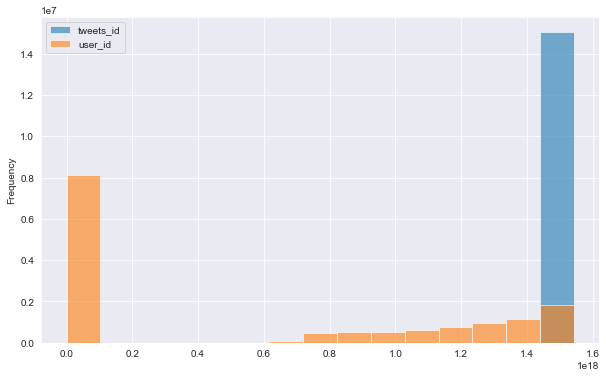

In [44]:
data3[["tweets_id","user_id"]].plot.hist(bins = 15, figsize = (10,6), alpha = 0.6)  #aplha = 0.6 for transparency
plt.show()

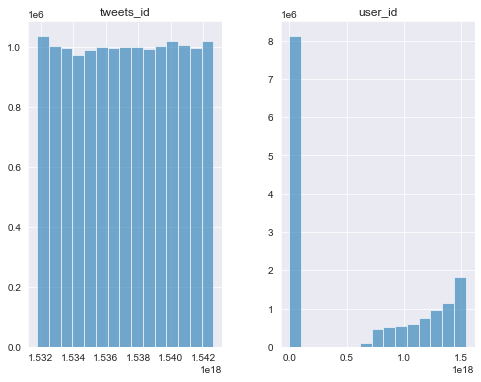

In [46]:
#individual histogram
data3[["tweets_id","user_id"]].hist(bins = 15, figsize = (8,6), alpha = 0.6)  #aplha = 0.6 for transparency
plt.show()

#range is different to all plots

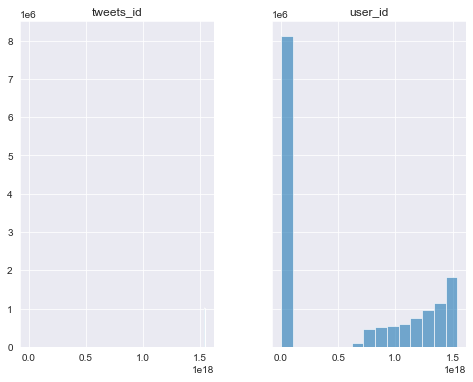

In [47]:
###if we want to compare then it should be same range

data3[["tweets_id","user_id"]].hist(bins = 15, figsize = (8,6), alpha = 0.6,sharex = True, sharey = True)  #aplha = 0.6 for transparency
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

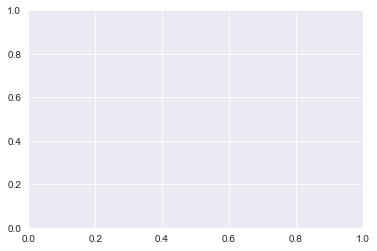

In [38]:
# Part 2. Users (20 marks)
# 1. Make a histogram with the number of users on the y-axis and number of
# tweets they make on the x-axis. Discuss the distribution that you see. All the
# users in the data set should be included! [5 marks]


# no of users and number of tweets...
import matplotlib.pyplot as plt
import seaborn as sns
# plotting two histograms on the same axis
# sns.scatterplot(data3["user_id"], data3['tweets_id'], ,data = data3)   #=25, alpha=0.45, color='red')
# plt.show()

categories = data3['user_id'].index
counts = data3['tweets_id'].value_counts().values
plt.bar(categories, counts)

In [66]:
#2. Find the top-5 users by total number of tweets.
# Do you think any are automated accounts (aka. bots)?
#Justify your answer. [5 marks]

data4 = data3.groupby(["user_id"])['tweets_id'].size().sort_values(ascending=False).reset_index(name='count')[0:5]
data4

,user_id,count
0,1.402776e+18,13382
1,1.491317e+18,12533
2,9.547321e+17,11632
3,1.384111e+09,11305
4,1.069584e+18,10087


In [67]:
#3. Find the 5 users who receive the most mentions and comment on this. [5
# marks]

In [ ]:

def info():    # multiprocess the files in the zip folders using the zip_ext
    list_of_zip_folders = dir_list(r"D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\twitter_data")
    # print(list_of_zip_folders)
    with Pool(6) as pool:
       result = pool.map(zip_extraction1 , list_of_zip_folders)  # pool.map returns a list with zip files inside twitter folder
    return result

if __name__ == "__main__":  # Pool works only when using this if statement
    t = time.time()
    out = info()     #r() ---> return res  #re return r() means re returns res
    print((time.time()-t)/60)   #14.68

len(reduce(concat, out))
out_list = reduce(concat,out)

In [ ]:
out_list

In [ ]:
#####drop none #####  None: 322
# print(15040709 - 322)
# updatedTupList_out_list = []
# for val in out_list:
#     if val != None:
#         updatedTupList_out_list.append(val)
# print(len(updatedTupList_out_list))

# Updating Values
updatedTupList_out_list1 = [out_list for out_list in out_list if not all(vals == None for vals in out_list)]
len(updatedTupList_out_list1)

In [ ]:
import pandas as pd
data_user_mention = pd.DataFrame(updatedTupList_out_list1 , columns  =["user_mention"])#,"user_id"])
data_user_mention.head()

In [ ]:
# Find the 5 users who receive the most mentions
data_top_5_users_mention = data_user_mention['user_mention'].value_counts.sort_values(ascending=False).reset_index(name='count')[0:5]
# .size().sort_values(ascending=False).reset_index(name='count')[0:5]
data_top_5_users_mention


In [51]:
#Choose 4 countries and compute how often they mention each other. This
# means you should compute 16 numbers e.g. UK mentions UK, UK mentions
# France, France mentions UK etc. Comment on any patterns you observe. [5
# marks]


In [124]:
newList = set()
datafile = open ("list_of_tweets_all1.txt", "r")
lines = list(datafile)

for i in lines:
    if lines.count(i) >= 2:
        newList.add(i)

datafile.close()
print(len(newList))

KeyboardInterrupt: 

In [ ]:
lines_seen = set() # holds lines already seen.

with open("file.txt", "r+") as f:
    d = f. readlines()
    f. seek(0)
    for i in d:
        if i not in lines_seen:
            f. write(i)

In [125]:
list_of_tweets = []

for file_name in os.listdir(new_path):
    # print('first loop entered')
    file_path = os.path.join(new_path , file_name)
    with open(file_path , 'r') as infile:
        for file_name in infile.namelist():
            # print('second loop entered')
            # print(file_name)
            with infile.open(file_name) as f:
                # print('third loop entered')
                for line in f:
                    tweet = ndjson.loads(line)[0]
                    # print(tweet)
                    d = {}

                    try:
                        d['user_id'] = tweet.get('user').get('id')
                    except AttributeError:
                        d['user_id'] = tweet.get('user')
                    try:
                        d['coord'] = tweet.get('coordinates').get('coordinates')
                    except AttributeError:
                        d['coord'] = tweet.get('coordinates')
                    try:
                        d['bounding_box_coord'] = tweet.get('place').get('bounding_box').get('coordinates')
                    except AttributeError:
                        d['bounding_box_coord'] = tweet.get('place')   
                    d['time_stamp'] = tweet.get('timestamp_ms')
                    d['tweet_id'] = tweet.get('id')

                    list_of_tweets.append(d)

                break
            
        break

NameError: name 'new_path' is not defined

In [ ]:
len(list_of_tweets)

In [ ]:
with open('list_of_tweets_all.txt' , 'r') as in_file:
    list_of_tweets_all = ndjson.load(in_file)

In [ ]:
sys.getsizeof(list_of_tweets_all)

In [ ]:
df_of_tweets = pd.DataFrame(
    list_of_tweets_all
)

In [ ]:
os.path.join(path , 'tweets.pkl')

In [ ]:
df_of_tweets.to_pickle(os.path.join(path , 'tweets.pkl'))

In [ ]:
%%time
list_of_tweets = []

for file_name in [(os.listdir(new_path))[0]]:   #file name is varibale of different 720 json file (first file)
    # print('first loop entered')
#     print(file_name)
    file_path = os.path.join(new_path , file_name)   #going inside folder geoeurope and first file
#     print(file_path)
    with open(file_path , 'r') as json_file:
        json_obj =  (obj for obj in ndjson.load(json_file))
        while True:
            try:
                d = {}
                # load the dict
                d['user'] = next(json_obj).get('user').get("id_str")
                list_of_tweets.append(d)

            except StopIteration:
                break

# #         break


In [ ]:
%%time
list_of_tweets = []

for file_name in [(os.listdir(new_path))[1]]:   #file name is varibale of different 720 json file (first file)
    # print('first loop entered')
#     print(file_name)
    file_path = os.path.join(new_path , file_name)   #going inside folder geoeurope and first file
#     print(file_path)
    with open(file_path , 'r') as json_file:
        json_obj =  (obj for obj in ndjson.load(json_file))
        while True:
            try:
                d = {}
                # load the dict
                d['user'] = next(json_obj).get('user').get("id_str")
                list_of_tweets.append(d)

            except StopIteration:
                break

# #         break

In [ ]:
%%time
list_of_tweets = []

for file_name in os.listdir(new_path):   #file name is varibale of different 720 json file (first file)
    # print('first loop entered')
#     print(file_name)
    file_path = os.path.join(new_path , file_name)   #going inside folder geoeurope and first file
#     print(file_path)
    with open(file_path , 'r') as json_file:
        json_obj =  (obj for obj in ndjson.load(json_file))
        while True:
            try:
                d = {}
                # load the dict
                tweets = next(json_obj)


                d['user_id'] = tweets.get('user').get('id')
            except AttributeError:
                d['user_id'] = tweets.get('user')
                list_of_tweets.append(d)

            except StopIteration:
                break

# #         break

In [ ]:
path = os.getcwd()
new_path = os.path.join(path , r'D:\UOE MODULES PYTHON DIRECTORy_codes\IDS\assignment\extracted files\geoEurope')
new_path